### Importing packages
You have to **install** packages once. This is done in the anaconda prompt (terminal). See instructions here: https://docs.anaconda.com/anaconda/user-guide/tasks/install-packages/

You have to **import** packages every time you open a new notebook. See the cell below. 
- You can import the entire package like done for import pandas which will install subpackages
- You can shorten the name of packages, which will be referenced frequently throughout your code by adding "as shortened_name" after your import of the packages
- You can also import subsets of entire packages as done in the final line where matplotlib.pyplot is imported

#### Managing packages with static environments is a best practice in data science. To learn how to do this see my class here: https://kelseyemnett.com/2021/02/07/python-environments/

In [98]:
# To install packages on Anaconda, see this link: https://docs.anaconda.com/anaconda/user-guide/tasks/install-packages/
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

### Setting your working directory
Setting your working directory below will set a default location for all files to be imported and exported into and out of. Make sure to import the os package (previous cell) first!

In [99]:
# Set working directory
os.chdir("/Users/kelsey.huntzberry/Documents/Mentorship/Intro/Python_Intro")
print(os.getcwd())

/Users/kelsey.huntzberry/Documents/Mentorship/Intro/Python_Intro


### Read in csv data
Below I am reading a csv into this notebook. NOTE: I recommend using encoding='latin', because without it if there are symbols that are not unicode compliant in your spreadsheet, the .csv file will not read in and error out.

In [100]:
# Read in data
prescribe_data = pd.read_csv('state_prescribe_overdose_data.csv', encoding='latin')
pres_data_county = pd.read_csv('county_prescribing_rates_data.csv', encoding='latin')
census_data = pd.read_csv('US_census_data.csv', encoding='latin')

### Get "bird's eye view" of the data
You can see below how to see the first 5 rows of your Pandas dataframe. Add n=10 inside parentheses to see 10 rows instead of 5! The next cells shows how to see the last 5 rows of your dataframe.

In [101]:
# See top 5 rows of data
prescribe_data.head()

,state,prescribing_rate,year,state_abbr,region,overdose.rate
0,Alabama,107.2,2017,AL,South,6.6
1,Alabama,121.0,2016,AL,South,5.0
2,Alabama,125.0,2015,AL,South,3.4
3,Alabama,135.2,2014,AL,South,3.3
4,Alabama,142.4,2013,AL,South,2.4


In [102]:
prescribe_data.tail()

,state,prescribing_rate,year,state_abbr,region,overdose.rate
607,Wyoming,80.4,2010,WY,West,6.4
608,Wyoming,81.0,2009,WY,West,4.3
609,Wyoming,81.0,2008,WY,West,5.3
610,Wyoming,80.8,2007,WY,West,NaN
611,Wyoming,79.9,2006,WY,West,NaN


### See summary statistics easily
Place .describe() after a dataframe to see basic summary statistics about all continuous columns in your dataframe.

In [103]:
# Find summary statistics of all columns
prescribe_data.describe()

,prescribing_rate,year,overdose.rate
count,612.000000,612.000000,592.000000
mean,79.405392,2011.500000,6.805743
std,23.163919,3.454876,5.423637
min,28.500000,2006.000000,0.200000
25%,62.300000,2008.750000,3.500000
50%,77.200000,2011.500000,5.000000
75%,91.600000,2014.250000,7.900000
max,146.900000,2017.000000,43.100000


### Renaming columns
- To rename columns in place in your current dataframe, .rename with the format {"old_col_name":"new_col_name"}
- To create a *new* dataframe with a new name in your dataframe run the commented out code

In [104]:
# Renaming columns in place
prescribe_data.rename(columns={'overdose.rate':'overdose_rate'},inplace=True)
# prescribe_data_new = prescribe_data.rename(columns={'overdose.rate':'overdose_rate'})

### Printing column names of a dataframe in a list

In [105]:
# Print column names
prescribe_data.columns

Index(['state', 'prescribing_rate', 'year', 'state_abbr', 'region',
       'overdose_rate'],
      dtype='object')

### Find summary statistic of one column
As shown below, you should refer write the df.column_name followed by .mean(), .median(), or whatever summary statistic you want to find

In [106]:
# Find the mean of a single column
prescribe_data.prescribing_rate.mean()

79.40539215686273

In [107]:
prescribe_data.prescribing_rate.median()

77.2

### Find number of rows by group
Use the same structure as above except follow your column name with .value_counts() to see how many rows are in each group, in this case year.

In [108]:
# Count number of rows in each year
prescribe_data.year.value_counts()

2017    51
2016    51
2015    51
2014    51
2013    51
2012    51
2011    51
2010    51
2009    51
2008    51
2007    51
2006    51
Name: year, dtype: int64

In [109]:
prescribe_data.head()

,state,prescribing_rate,year,state_abbr,region,overdose_rate
0,Alabama,107.2,2017,AL,South,6.6
1,Alabama,121.0,2016,AL,South,5.0
2,Alabama,125.0,2015,AL,South,3.4
3,Alabama,135.2,2014,AL,South,3.3
4,Alabama,142.4,2013,AL,South,2.4


### Indexing in Python
You index using [], .loc, and .iloc in Pandas. See this URL for an overview of indexing: https://www.geeksforgeeks.org/indexing-and-selecting-data-with-pandas/

More information:
- Indexing starts at 0 in Python, not 1!
- Inside brackets when using iloc or loc, rows are listed first and columns are listed second (i.e. [rows, columns]
- When you want to pull *all* rows or columns, place a colon (like seen below when pulling all rows) in the area where you want all of the values
- When indexing by column names or row names, use .loc. When indexing by number, use .iloc.
- When indexing **by number** the final number is **not inclusive**

#### Selecting columns by name
Below you can see how to select 3 specific columns by name (i.e. with .loc) and all rows in a Pandas dataframe. We are subsetting the data to just the state, year, and prescribing_rate columns. The colon : signifies all rows.

In [110]:
# Select columns
prescribe_df = prescribe_data.loc[:,['state','prescribing_rate','year']]
prescribe_df.columns

Index(['state', 'prescribing_rate', 'year'], dtype='object')

#### Selecting columns by number
Below you can see perform the same task but with numbers instead of column names. Remember, indexing starts at 0 and the second number (i.e. 3) is not inclusive!

In [111]:
prescribe_data.iloc[:,0:3]

,state,prescribing_rate,year
0,Alabama,107.2,2017
1,Alabama,121.0,2016
2,Alabama,125.0,2015
3,Alabama,135.2,2014
4,Alabama,142.4,2013
...,...,...,...
607,Wyoming,80.4,2010
608,Wyoming,81.0,2009
609,Wyoming,81.0,2008
610,Wyoming,80.8,2007


### Dropping columns
You can also specify specific columns to drop, while keeping all over columns

In [112]:
# Drop overdose_rate column
overdose_df = prescribe_data.drop(columns=['overdose_rate'])
overdose_df.columns

Index(['state', 'prescribing_rate', 'year', 'state_abbr', 'region'], dtype='object')

### Summary statistics by group
Use groupby() to find grouped summary statistics. Below putting the column names inside brackets specifies to only find the mean of the two listed columns inside the brackets and not any other columns.

In [113]:
# Find mean prescribing rate and overdose rate
prescribe_data.groupby('region')['prescribing_rate','overdose_rate'].mean()

,prescribing_rate,overdose_rate
region,,
Midwest,72.907639,4.845113
Northeast,65.965741,8.232407
South,98.998958,7.663021
West,73.900000,6.218954


### Graphing with matplotlib
Create a quick scatterplot to look for outliers. Use the structure **plt.scatter(df.x_column, df.y_column)**

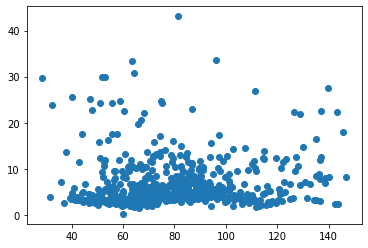

In [114]:
# Create quick scatter plot of prescribing rate and overdose rate
plt.scatter(prescribe_data.prescribing_rate,prescribe_data.overdose_rate)

### User-defined functions
#### One Input
The easiest way to create a new column using information from another column is to use a user-defined function and then the apply function to go through all rows. Use the following structure:

def function_name(input_value):

    function to complete
    return value_to_return
    
Now we will use the apply function to create a new bucketed column with this structure:

**df.loc[:, 'new_column'] = df.input_column_name(function_name)**

### If/else statements
You can create if/else statements in Python as follows;

if *first statement returning in True/False*:
    
    do something
    
elif *second statement to be performed if first statement is not true*:
    
    do something
    
else: <- Only used if first two conditions are not True
    
    do something

In [115]:
# Recode current variable to create a new variable with a user-defined function
def high_low_prescribe(rate):
    if rate > 79.40539215686273:
        return 'high_prescribing'
    else:
        return 'low_prescribing'
    
prescribe_data.loc[:, 'high_low_prescribe'] = prescribe_data.prescribing_rate.apply(high_low_prescribe)

In [116]:
# Find number of values in the new created columns by value
prescribe_data.high_low_prescribe.value_counts()

low_prescribing     321
high_prescribing    291
Name: high_low_prescribe, dtype: int64

#### Two Inputs
Below shows how to create a user-defined function with two inputs instead of one.

Specify two values in parentheses after new function name

Change your apply function to accommodate two inputs with this structure:
df.apply(lambda x: function_name(input1, input2), axis=1)
- For input1 and input2, it can be a single value or a series. If it is a series use df.column_name.
- axis=1 specifies that we want to apply the function to rows not columns

In [117]:
# Showing how to recode variables to create new variables when there are two inputs to the user-defined function
# Redoing the code above without hard coding the mean (avoiding hard coding is a best practice)
mean_pres = prescribe_data.prescribing_rate.mean()

# Recoding to mark high and low prescribing states
def high_low_prescribe(rate, mean):
    if rate > mean:
        return 'high_prescribing'
    else:
        return 'low_prescribing'
    
prescribe_data.loc[:, 'high_low_prescribe'] = prescribe_data.apply(lambda x: high_low_prescribe(x.prescribing_rate, mean_pres), axis=1)

In [118]:
# Recoding to mark high and low overdose states
mean_od = prescribe_data.overdose_rate.mean()

def high_low_overdose(rate, mean):
    if rate > mean:
        return 'high_overdoses'
    else:
        return 'low_overdoses'
    
prescribe_data.loc[:, 'high_low_overdoses'] = prescribe_data.apply(lambda x: high_low_overdose(x.overdose_rate, mean_od), axis=1)

In [119]:
# Printing the number of values in each category to show it is the same as above
prescribe_data.high_low_prescribe.value_counts()

low_prescribing     321
high_prescribing    291
Name: high_low_prescribe, dtype: int64

In [120]:
prescribe_data.high_low_overdoses.value_counts()

low_overdoses     429
high_overdoses    183
Name: high_low_overdoses, dtype: int64

In [121]:
prescribe_data.overdose_rate.describe()

count    592.000000
mean       6.805743
std        5.423637
min        0.200000
25%        3.500000
50%        5.000000
75%        7.900000
max       43.100000
Name: overdose_rate, dtype: float64

In [122]:
# Show number of rows and columns in the original dataframe
prescribe_data.shape

(612, 8)

### Filtering dataframes
Filter dataframe rows using indexing with the following structure:
**df[df.column_to_filter_by == 'value']**

### Getting number of rows and columns
To get the number of rows and columns in a dataframe use **df.shape**. The output will be (# of rows, # of columns).

In [123]:
# Filtering the prescribe_data dataframe to just include high prescribing states
high_prescribing = prescribe_data[prescribe_data.high_low_prescribe == 'high_prescribing']
# Printing the resulting dataframe's number of rows and columns
high_prescribing.shape

(291, 8)

In [124]:
pres_data_county.head()

,county,state_abbr,FIPS,prescribing_rate,year,rur_mic_metro,rural_metro,state,region
0,Anchorage,AK,2020,71.5,2006,Metropolitan,Metropolitan,Alaska,West
1,Fairbanks North Star,AK,2090,54.7,2006,Metropolitan,Metropolitan,Alaska,West
2,Juneau,AK,2110,95.3,2006,Micropolitan,Rural,Alaska,West
3,Kenai Peninsula,AK,2122,89.1,2006,Micropolitan,Rural,Alaska,West
4,Ketchikan Gateway,AK,2130,144.4,2006,Micropolitan,Rural,Alaska,West


In [125]:
prescribe_data.columns

Index(['state', 'prescribing_rate', 'year', 'state_abbr', 'region',
       'overdose_rate', 'high_low_prescribe', 'high_low_overdoses'],
      dtype='object')

In [126]:
# Rename columns to mark which columns are state metrics for merge
prescribe_data.rename(columns={'prescribing_rate':'pres_rate_state',
                               'overdose_rate':'od_rate_state'},inplace=True)

In [127]:
prescribe_data.columns

Index(['state', 'pres_rate_state', 'year', 'state_abbr', 'region',
       'od_rate_state', 'high_low_prescribe', 'high_low_overdoses'],
      dtype='object')

In [128]:
pres_data_county.columns

Index(['county', 'state_abbr', 'FIPS', 'prescribing_rate', 'year',
       'rur_mic_metro', 'rural_metro', 'state', 'region'],
      dtype='object')

In [129]:
# Rename columns to mark which columns are county metrics for merge
pres_data_county.rename(columns={'prescribing_rate':'pres_rate_county'},inplace=True)

In [130]:
pres_data_county.columns

Index(['county', 'state_abbr', 'FIPS', 'pres_rate_county', 'year',
       'rur_mic_metro', 'rural_metro', 'state', 'region'],
      dtype='object')

### Merging Two Dataframes
Use pd.merge() to merge two dataframes. Use the following structure:
**pd.merge(df1, df2, how="merge_type", on=[col_merge_on1, col_merge_on2])**

See this link for more examples: https://www.tutorialspoint.com/python_pandas/python_pandas_merging_joining.htm

In [131]:
# Merge county and state overdose/prescribing data
pres_merged = pd.merge(pres_data_county, prescribe_data, how='left', on=['state','state_abbr','region','year'])

In [132]:
# Check to make sure number of rows stayed constant (no duplicates)
pres_merged.shape

(33823, 13)

In [133]:
pres_data_county.shape

(33823, 9)

### Count nulls in a column
Count nulls in a column by using the following structure: **df.column_name.isnull().sum()**

In [134]:
# check for nulls in rur_mic_metro
pres_merged.rur_mic_metro.isnull().sum()

0

In [135]:
######## Check for nulls in od_rate_state
pres_merged.od_rate_state.isnull().sum()

523

In [136]:
# Find value counts of each year so we can see below if our year filter works
pres_merged.year.value_counts()

2015    2963
2016    2962
2014    2960
2017    2955
2008    2758
2006    2754
2013    2753
2009    2750
2007    2746
2011    2745
2010    2741
2012    2736
Name: year, dtype: int64

In [137]:
# Making sure merged dataframe looks good
pres_merged.head()

,county,state_abbr,FIPS,pres_rate_county,year,rur_mic_metro,rural_metro,state,region,pres_rate_state,od_rate_state,high_low_prescribe,high_low_overdoses
0,Anchorage,AK,2020,71.5,2006,Metropolitan,Metropolitan,Alaska,West,63.4,3.3,low_prescribing,low_overdoses
1,Fairbanks North Star,AK,2090,54.7,2006,Metropolitan,Metropolitan,Alaska,West,63.4,3.3,low_prescribing,low_overdoses
2,Juneau,AK,2110,95.3,2006,Micropolitan,Rural,Alaska,West,63.4,3.3,low_prescribing,low_overdoses
3,Kenai Peninsula,AK,2122,89.1,2006,Micropolitan,Rural,Alaska,West,63.4,3.3,low_prescribing,low_overdoses
4,Ketchikan Gateway,AK,2130,144.4,2006,Micropolitan,Rural,Alaska,West,63.4,3.3,low_prescribing,low_overdoses


In [138]:
# Filter data to just 2017 data (the most recent year) so it will merge with demographic data
pres_merged_2017 = pres_merged[pres_merged.year == 2017]

In [139]:
# Check to make sure just 2017 data is left and it matches the value_counts number above
pres_merged_2017.year.value_counts()
# NOTE: 2018 data is actually a combined metric of 2014-2018 data so will work well for our 2017 prescribing/overdose data

2017    2955
Name: year, dtype: int64

In [140]:
# Print columns in census_data
census_data.columns

Index(['county', 'state', 'FIPS', 'pop_total_2018', 'pop_lt_18_2018',
       'pop_18_to_64_2018', 'pop_gt_65_2018', 'pop_median_2018',
       'pop_pct_change_2016_17', 'pop_pct_change_2010_11',
       'pct_gt_high_school', 'pct_gt_bachelors', 'pct_public_ins_lt_65',
       'pct_public_ins_lt_19', 'pct_public_ins_19_to_64', 'unemployment_pct',
       'pct_married_15_over', 'pct_2_plus_races', 'pct_white', 'pct_black',
       'pct_am_ind_AK_native', 'pct_asian', 'pct_HA_pacific_islander',
       'pct_hispanic', 'med_hh_income', 'pct_govt_cash_asst',
       'pct_food_stamps', 'pct_lt_poverty', 'pct_private_ins_lt_65',
       'pct_private_ins_lt_19', 'pct_private_ins_19_to_64'],
      dtype='object')

### Create new columns with math procedures
- Use the same .loc procedure as shown before to create the new column
- Refer to other columns in the dataframe using df.column_name
- Use * for multiplication, / for division, - for subtraction, and + for addition

In [141]:
census_data.loc[:,'pct_pop_lt_18'] = census_data.pop_lt_18_2018/census_data.pop_total_2018*100
census_data.loc[:,'pct_pop_18_to_64'] = census_data.pop_18_to_64_2018/census_data.pop_total_2018*100
census_data.loc[:,'pct_pop_gt_65'] = census_data.pop_gt_65_2018/census_data.pop_total_2018*100

######### Add same percent metrics for 18 to 64 and greater than 65

In [142]:
# Print calculated columns to make sure they were calculated correctly
census_data.loc[:,'pct_pop_lt_18']

0       23.674035
1       21.607911
2       20.867328
3       20.477679
4       23.153527
          ...    
3137    26.224710
3138    18.365755
3139    28.789596
3140    22.739379
3141    20.769341
Name: pct_pop_lt_18, Length: 3142, dtype: float64

In [143]:
census_data.loc[:,'pct_pop_18_to_64']

0       60.763296
1       57.948739
2       59.712230
3       63.049107
4       58.609959
          ...    
3137    61.664073
3138    66.218968
3139    57.130893
3140    55.573874
3141    58.719678
Name: pct_pop_18_to_64, Length: 3142, dtype: float64

In [144]:
census_data.loc[:,'pct_pop_gt_65']

0       15.562670
1       20.443350
2       19.420441
3       16.473214
4       18.236515
          ...    
3137    12.111217
3138    15.415277
3139    14.079511
3140    21.686747
3141    20.510980
Name: pct_pop_gt_65, Length: 3142, dtype: float64

In [145]:
# How to calculate the 33rd percentile of poverty is shown below. Use these in your user-defined function
poverty_33_percentile = census_data.pct_lt_poverty.quantile(q=0.3333)
poverty_33_percentile

8.6

In [146]:
# How to calculate the 66th percentile of poverty is shown below. Use these in your user-defined function
poverty_66_percentile = census_data.pct_lt_poverty.quantile(q=0.6666)
poverty_66_percentile

12.9

In [147]:
# Drop raw population metrics
census_data = census_data.drop(columns=['pop_total_2018', 'pop_lt_18_2018','pop_18_to_64_2018', 'pop_gt_65_2018'])
census_data.columns

Index(['county', 'state', 'FIPS', 'pop_median_2018', 'pop_pct_change_2016_17',
       'pop_pct_change_2010_11', 'pct_gt_high_school', 'pct_gt_bachelors',
       'pct_public_ins_lt_65', 'pct_public_ins_lt_19',
       'pct_public_ins_19_to_64', 'unemployment_pct', 'pct_married_15_over',
       'pct_2_plus_races', 'pct_white', 'pct_black', 'pct_am_ind_AK_native',
       'pct_asian', 'pct_HA_pacific_islander', 'pct_hispanic', 'med_hh_income',
       'pct_govt_cash_asst', 'pct_food_stamps', 'pct_lt_poverty',
       'pct_private_ins_lt_65', 'pct_private_ins_lt_19',
       'pct_private_ins_19_to_64', 'pct_pop_lt_18', 'pct_pop_18_to_64',
       'pct_pop_gt_65'],
      dtype='object')

In [148]:
pres_merged_2017.columns

Index(['county', 'state_abbr', 'FIPS', 'pres_rate_county', 'year',
       'rur_mic_metro', 'rural_metro', 'state', 'region', 'pres_rate_state',
       'od_rate_state', 'high_low_prescribe', 'high_low_overdoses'],
      dtype='object')

# Exercises
Complete exercises below. Make sure to check your code for accuracy and investigate if needed to make sure your code was done correctly (i.e. investigate missing values, count rows after merges). There is more than one way to everything in Python so your answers may look different than mine!

### Exercise 1: Merge in census data. Use an inner join

In [149]:
# Going to drop county because often county names can be spell slightly differently
pres_merged_2017_sm = pres_merged_2017.drop(columns=['county','state'])

census_pres = pd.merge(pres_merged_2017_sm, census_data, how='inner', on='FIPS')
census_pres

,state_abbr,FIPS,pres_rate_county,year,rur_mic_metro,rural_metro,region,pres_rate_state,od_rate_state,high_low_prescribe,...,med_hh_income,pct_govt_cash_asst,pct_food_stamps,pct_lt_poverty,pct_private_ins_lt_65,pct_private_ins_lt_19,pct_private_ins_19_to_64,pct_pop_lt_18,pct_pop_18_to_64,pct_pop_gt_65
0,AK,2020,59.4,2017,Metropolitan,Metropolitan,West,52.0,9.2,low_prescribing,...,105010,5.7,8.2,5.2,0.710010,0.631102,0.743349,24.469880,64.439627,11.090492
1,AK,2090,42.9,2017,Metropolitan,Metropolitan,West,52.0,9.2,low_prescribing,...,91968,5.1,7.2,4.5,0.777695,0.740668,0.793804,24.109082,65.580827,10.310091
2,AK,2110,65.7,2017,Micropolitan,Rural,West,52.0,9.2,low_prescribing,...,106849,5.8,7.6,4.0,0.768805,0.693464,0.795914,21.268645,65.347367,13.383988
3,AK,2122,83.0,2017,Micropolitan,Rural,West,52.0,9.2,low_prescribing,...,82690,6.3,9.0,7.4,0.603543,0.547445,0.626870,22.597509,59.996925,17.405566
4,AK,2130,77.4,2017,Micropolitan,Rural,West,52.0,9.2,low_prescribing,...,83221,8.5,15.5,8.0,0.657723,0.585865,0.685313,22.287685,62.178474,15.533841
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2950,WY,56037,88.1,2017,Micropolitan,Rural,West,64.8,6.2,low_prescribing,...,81763,1.5,5.3,10.5,0.765439,0.728823,0.782276,26.224710,61.664073,12.111217
2951,WY,56039,59.4,2017,Micropolitan,Rural,West,64.8,6.2,low_prescribing,...,121879,0.8,2.3,1.8,0.828737,0.843336,0.824455,18.365755,66.218968,15.415277
2952,WY,56041,100.2,2017,Micropolitan,Rural,West,64.8,6.2,low_prescribing,...,71948,1.2,6.5,13.1,0.723884,0.657515,0.759605,28.789596,57.130893,14.079511
2953,WY,56043,78.7,2017,Micropolitan,Rural,West,64.8,6.2,low_prescribing,...,63788,2.4,6.8,8.6,0.669705,0.641945,0.682443,22.739379,55.573874,21.686747


In [150]:
# Checking row counts to confirm that they are the same before and after the merge
census_pres.shape

(2955, 40)

In [151]:
pres_merged_2017_sm.shape

(2955, 11)

In [152]:
census_data.shape

(3142, 30)

In [153]:
# Checking why rows were dropped from the census data by doing an outer join and investigating whihc rows are missing
merge_test = census_pres = pd.merge(pres_merged_2017, census_data, how='outer', on='FIPS')

In [154]:
# Looking at leftover counties to see if they are legitimately missing and not mismatced FIPS
# Subsetting to just columns with missing county in prescribing data
merge_test_sm  = merge_test[merge_test.county_x.isna()]
# Subsetting to a group of rows to look for counties to check in the original dataframe
merge_test_sm.loc[:,['state_y','county_y']].iloc[19:30,]

,state_y,county_y
2974,Colorado,Costilla
2975,Colorado,Custer
2976,Colorado,Dolores
2977,Colorado,Gilpin
2978,Colorado,Hinsdale
2979,Colorado,Jackson
2980,Colorado,Mineral
2981,Colorado,Park
2982,Colorado,Phillips
2983,Colorado,Saguache


In [155]:
# Filtering of prescribing dataframe showing zero rows, value is legitimately missing not a coding error
# Checking the original data frame with the smaller row count
pres_merged_2017_sm[pres_merged_2017_sm.pres_rate_county == 'Mineral']

,state_abbr,FIPS,pres_rate_county,year,rur_mic_metro,rural_metro,region,pres_rate_state,od_rate_state,high_low_prescribe,high_low_overdoses


In [156]:
# Subsetting to top 10 rows to look for counties to check in the original dataframe
merge_test_sm.loc[:,['state_y','county_y']].iloc[0:10,]

,state_y,county_y
2955,Alaska,Aleutians East
2956,Alaska,Aleutians West
2957,Alaska,Bethel
2958,Alaska,Bristol Bay
2959,Alaska,Denali
2960,Alaska,Dillingham
2961,Alaska,Haines
2962,Alaska,Hoonah-Angoon
2963,Alaska,Kusilvak
2964,Alaska,Lake and Peninsula


In [157]:
# Checking a second value in the original dataframe, looks good!
pres_merged_2017_sm[pres_merged_2017_sm.pres_rate_county == 'Bristol Bay']

,state_abbr,FIPS,pres_rate_county,year,rur_mic_metro,rural_metro,region,pres_rate_state,od_rate_state,high_low_prescribe,high_low_overdoses


### Exercise 2: Create user-defined function to find states with high, medium, and low poverty based on pct_lt_poverty rate calculated earlier

In [158]:
# Getting cut off quantiles
low_cutoff = census_pres.pct_lt_poverty.quantile(q=0.33333)
high_cutoff = census_pres.pct_lt_poverty.quantile(q=0.66666)

# Creating user-defined function to make low, medium, high cut offs
def high_med_low_poverty(poverty, low_cutoff, high_cutoff):
    if poverty > high_cutoff:
        return 'high_poverty_rate'
    elif poverty <= high_cutoff and poverty > low_cutoff:
        return 'medium_poverty_rate'
    else:
        return 'low_poverty_rate'
    
census_pres.loc[:, 'poverty_category'] = census_pres.apply(lambda x: high_med_low_poverty(x.pct_lt_poverty, low_cutoff, high_cutoff), axis=1)

### Exercise 3: Use value_counts() to count the number of states in each bucket. The buckets should be close (not exact) to equal

In [159]:
census_pres.poverty_category.value_counts()

# Results look good!

low_poverty_rate       1065
high_poverty_rate      1046
medium_poverty_rate    1031
Name: poverty_category, dtype: int64